<a href="https://colab.research.google.com/github/AlterntiveCurrent/ml-project/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold  # For data splitting and K-Fold cross-validation
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve  # For ROC curve calculation
import matplotlib.pyplot as plt  # For plotting


In [ ]:
data = pd.read_csv('titanic.csv')

In [ ]:
# 1. Handle missing values
age_imputer = SimpleImputer(strategy='median')
data['Age'] = age_imputer.fit_transform(data['Age'].values.reshape(-1, 1))

data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data['Has_Cabin'] = data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
# 2. Feature Engineering
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3,
                  "Col": 3, "Major": 3, "Mlle": 1, "Countess": 2, "Ms": 1, "Lady": 2,
                  "Jonkheer": 3, "Don": 3, "Dona": 2, "Mme": 2, "Capt": 3, "Sir": 3}
data['Title'] = data['Title'].map(title_mapping)
data['Title'].fillna(0, inplace=True)
data.drop('Name', axis=1, inplace=True)

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data['Is_Alone'] = 0
data.loc[data['FamilySize'] == 1, 'Is_Alone'] = 1


In [ ]:
# 3. Encoding categorical variables
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1}).astype(int)

embarked_encoded = pd.get_dummies(data['Embarked'], prefix='Embarked')
data = pd.concat([data, embarked_encoded], axis=1)


In [ ]:
# 4. Drop unnecessary columns
data.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
data.drop('Embarked', axis=1, inplace=True)



In [ ]:
# 5. Scale numerical features (optional)
scaler = StandardScaler()
numerical_cols = ['Age', 'Fare']

# Check for right skew in Fare before scaling
if data['Fare'].skew() > 0:
  # Apply log transformation if Fare is right-skewed
  data['Fare'] = np.log(data['Fare'] + 1)  # Avoid log(0) by adding 1

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print(data.head())

# Save the cleaned data
data.to_csv('titanic_cleaned.csv', index=False)

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Has_Cabin  Title  \
0         0       3    1  0.386231      0      0 -0.866767          0      0   
1         1       3    0  1.371370      1      0 -0.968773          0      2   
2         0       2    1  2.553537      0      0 -0.669205          0      0   
3         0       3    1 -0.204852      0      0 -0.773486          0      0   
4         1       3    0 -0.598908      1      1 -0.443987          0      2   

   FamilySize  Is_Alone  Embarked_C  Embarked_Q  Embarked_S  
0           1         1           0           1           0  
1           2         0           0           0           1  
2           1         1           0           1           0  
3           1         1           0           0           1  
4           3         0           0           0           1  


In [ ]:
# Split data into training and test sets (80/20 split)
X = data.drop('Survived', axis=1)  # Features
y = data['Survived']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set X shape:", X_train.shape)
print("Training set y shape:", y_train.shape)
print("Test set X shape:", X_test.shape)
print("Test set y shape:", y_test.shape)

Training set X shape: (334, 13)
Training set y shape: (334,)
Test set X shape: (84, 13)
Test set y shape: (84,)


In [ ]:
# Scale numerical features (optional)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Age', 'Fare']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])  # Use the fitted scaler


In [ ]:
# Impute missing values in numerical features
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
numerical_cols = ['Age', 'Fare']  # Assuming these are your numerical features
X_train[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])

In [ ]:
# Set a classification threshold (optional)
threshold = 0.7

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions and apply the threshold
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= threshold).astype(int)



In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

1.0

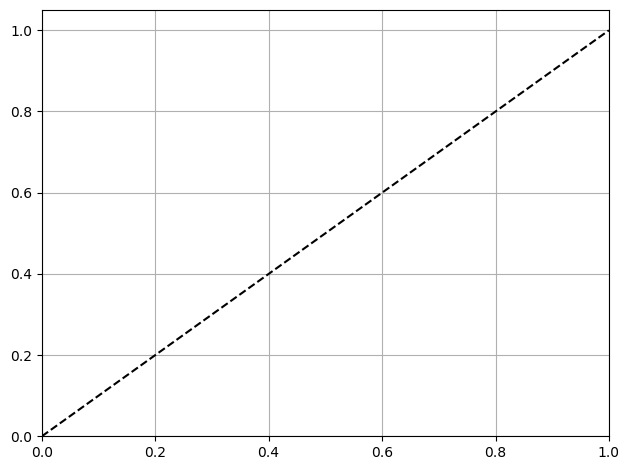

In [ ]:
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')  # No skill line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate accuracy score based on threshold
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy with threshold {threshold:.2f}: {accuracy:.4f}")

Accuracy with threshold 0.70: 1.0000


In [ ]:
# Train an SVM model (linear kernel)
model = SVC(kernel='rbf', C=1.0, gamma=0.1)  # Setting linear kernel initially
model.fit(X_train, y_train)

SVC(gamma=0.1)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9850746268656716

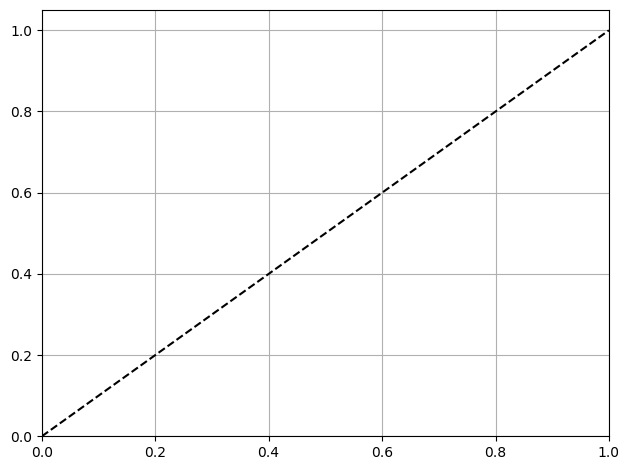

In [ ]:
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')  # No skill line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("SVM (Linear Kernel) Accuracy:", accuracy)


SVM (Linear Kernel) Accuracy: 0.9880952380952381


In [ ]:
# Train a K-Nearest Neighbors model
model = KNeighborsClassifier(n_neighbors=10)  # Setting initial neighbors to 10
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9850746268656716

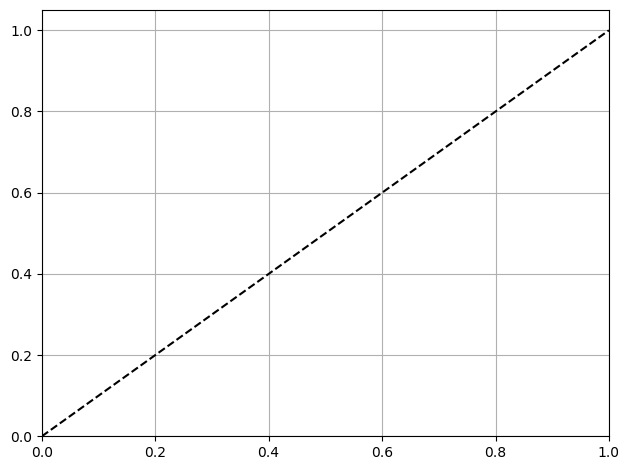

In [ ]:
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')  # No skill line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.9880952380952381


In [ ]:
# Train a Naive Bayes model (GaussianNB)
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

1.0

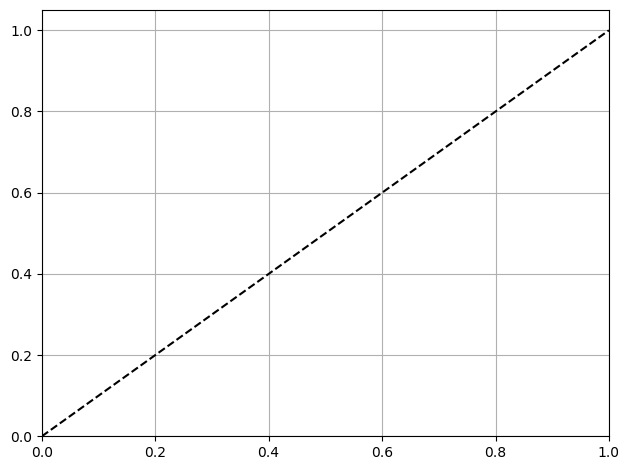

In [ ]:
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')  # No skill line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

Naive Bayes Accuracy: 1.0


In [ ]:
# Train a Decision Tree model
model = DecisionTreeClassifier(max_depth= 2)  # Setting initial max_depth
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

1.0

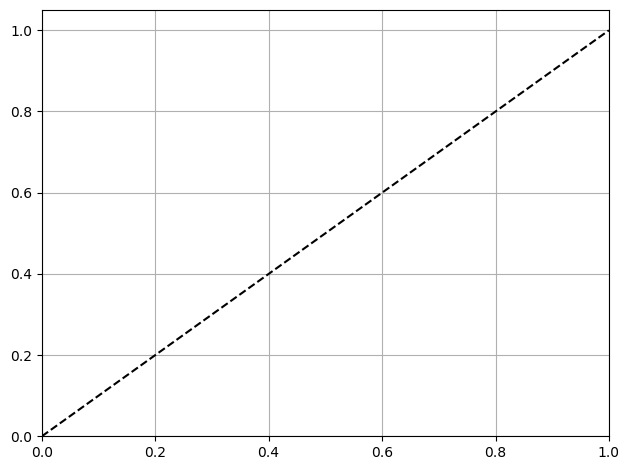

In [ ]:
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')  # No skill line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 1.0


In [ ]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=3)  # Initial hyperparameters
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

1.0

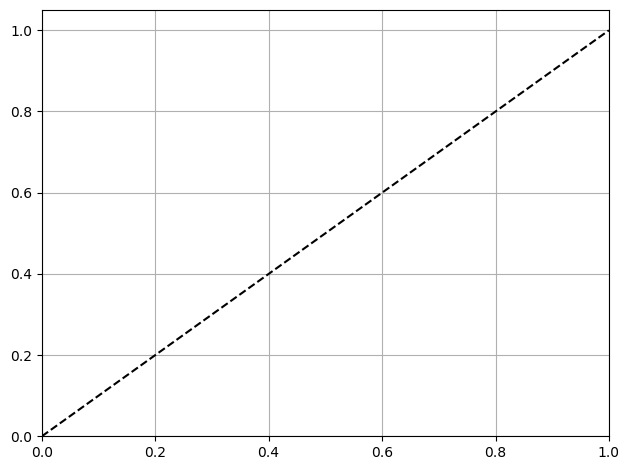

In [ ]:
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')  # No skill line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 1.0
